In [2]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
from matplotlib import patches

(657, 876, 3)


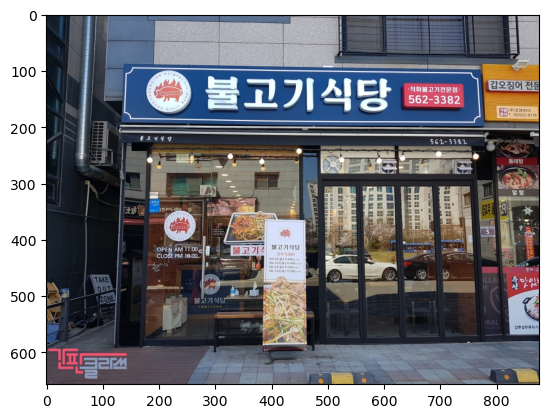

In [3]:
#input image could be of any size
img0 = cv2.imread('keras-frcnn/dataset/sign2.jpg')
img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
print(img0.shape)
plt.imshow(img0)
plt.show()

In [4]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('keras-frcnn/train.csv')
train.head()

,Image_names,Cell_type,xmin,xmax,ymin,ymax
0,sign1.jpg,Flat,300,1600,300,550
1,sign2.jpg,Flat,120,780,80,190
2,sign3.jpg,Flat,400,1450,80,400
3,sign4.jpg,Cubic,0,330,40,80
4,sign5.jpg,Flat,300,1650,200,450


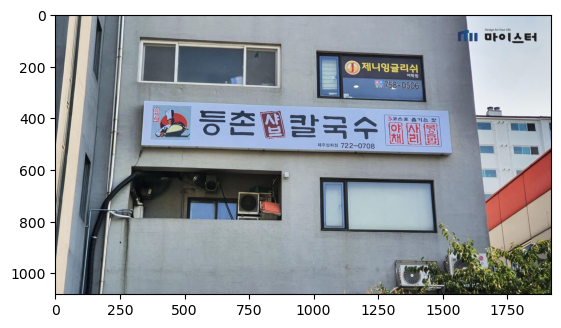

In [5]:
# reading single image using imread function of matplotlib
image = plt.imread('keras-frcnn/dataset/sign1.jpg')
plt.imshow(image)

In [6]:
# Number of unique training images
print("Nuber of trainging images :", train['Image_names'].nunique())
# Nuber of classes
print(train['Cell_type'].value_counts())

Nuber of trainging images : 10
Flat     5
Cubic    5
Name: Cell_type, dtype: int64


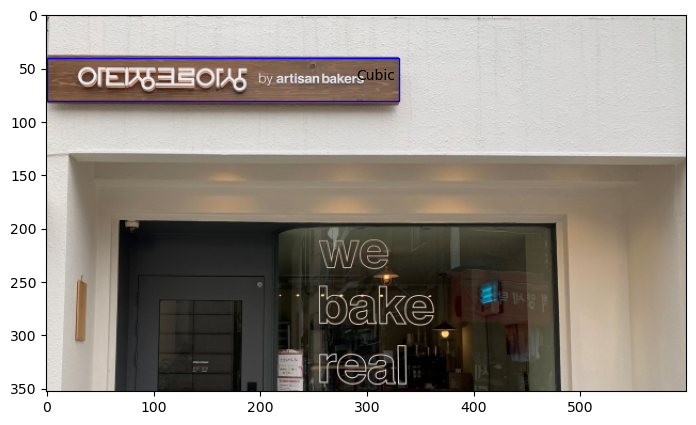

In [10]:
fig = plt.figure()

# add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('keras-frcnn/dataset/sign4.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.Image_names == "sign4.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.Cell_type == 'Flat':
        edgecolor = 'r'
        ax.annotate('Flat', xy=(xmax-40, ymin+20))
    elif row.Cell_type == 'Cubic':
        edgecolor = 'b'
        ax.annotate('Cubic', xy=(xmax-40, ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin, ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [14]:
data = pd.DataFrame()
data['format'] = train['Image_names']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'C:/Users/softn/OneDrive/signboard/keras-frcnn/dataset/' + data['format'][i]
    
# add xmin, ymin, xamx, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['Cell_type'][i]
    
data.to_csv('annotate.txt', header=None, index=None, sep=' ')